# Project1a: Ridge regression
**Author: Chenwei Xiao, Chim Lo Yui**

**Date: 2020/3**

## Description of the task:
* Ridge regression
* Cross validation to choose appropriate parameter: lambda

In [51]:
# Python Notebook Commands
%matplotlib inline
# %reload_ext autoreload
# %load_ext autoreload
# %autoreload 2

# General math and plotting modules.
import numpy as np
import pandas as pd
from math import sqrt

# Machine Learning library. 
import sklearn
from sklearn.linear_model import Ridge
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
# Load data
df_train=pd.read_csv('train.csv')

In [53]:
print(df_train.shape)
df_train.head()

(506, 15)


,Id,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0,22.6,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
1,1,50.0,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
2,2,23.0,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
3,3,8.3,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
4,4,21.2,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34


In [50]:
df_train = shuffle(df_train,random_state=42)
df_train.head()

,Id,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
173,173,27.0,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
274,274,13.1,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5.0,403.0,14.7,88.63,16.14
491,491,24.2,0.08826,0.0,10.81,0.0,0.413,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72
72,72,23.5,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67
452,452,14.5,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04


x1-13 is predictors and y is outcome.

In [54]:
# Shuffle the dataset
df_train = shuffle(df_train,random_state=42)
df_train.head()

# Extract X,y and do ridge regression
X = df_train.iloc[:,2:]
y = df_train.iloc[:,1]
ls_Lambda = np.array([0.01, 0.1, 1, 10, 100])

ridgereg = Ridge(alpha=ls_Lambda[0])
print(cross_val_score(ridgereg, X, y, cv=10, scoring='r2'))
print(cross_val_score(ridgereg, X, y, cv=10, scoring='neg_mean_squared_error'))

# Use cross validation and RMSE as critierion for choosing appropriate lambda
ls_rmse = np.array([])
for Lambda in ls_Lambda:
    ridgereg = Ridge(alpha=Lambda)
    rmse = (-cross_val_score(ridgereg, X, y, cv=10, scoring='neg_mean_squared_error'))**0.5
    ls_rmse = np.append(ls_rmse,rmse.mean())

print(ls_rmse)



[0.6945051  0.78972856 0.63475864 0.70471845 0.797733   0.66566086
 0.65375212 0.69802744 0.65998675 0.77477462]
[-18.13266474 -18.52696091 -25.96004402 -24.89530236 -21.71824188
 -29.75589832 -20.14587753 -32.49461613 -32.49291187 -14.06205363]
[4.84013585 4.84057347 4.85820322 4.91132601 4.98837432]


In [57]:
df_rmse = pd.DataFrame({'Lambda':ls_Lambda, 'RMSE':ls_rmse})
df_rmse

,Lambda,RMSE
0,0.01,4.840136
1,0.10,4.840573
2,1.00,4.858203
3,10.00,4.911326
4,100.00,4.988374


<AxesSubplot:xlabel='Lambda'>

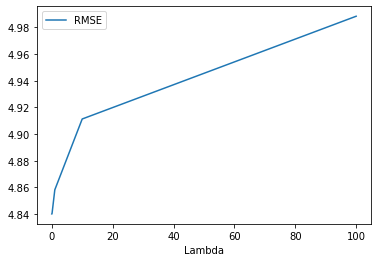

In [58]:
df_rmse.to_csv('Result_rmse.csv',index=False)
df_rmse.plot(x='Lambda',y='RMSE')

## Below shows some more detailed/fundmental processing

In [22]:
# Load data
def ReadCSV(fileName):
    with open(fileName, "r") as f:
        headers = f.readline().strip("\n")
        data = np.loadtxt(f, delimiter=",")
    return headers, data
head_train, data_raw = ReadCSV("train.csv")

# Shuffle data
np.random.seed(0)
np.random.shuffle(data_raw)

# Normalize data
#X_mean = np.mean(data_raw[:,2:], axis=0)
#X_std = np.std(data_raw[:,2:], axis=0)
#Y_mean = np.mean(data_raw[:,1])

#X_norm = (data_raw[:,2:] - X_mean)/X_std
#for y centered is enough
#Y_norm = (data_raw[:,1] - Y_mean)

# Without normalizing data
X_norm = data_raw[:,2:]
Y_norm = data_raw[:,1]

# Add ones to X for constant weight
X_norm = np.concatenate((np.ones(X_norm.shape[0]).reshape(X_norm.shape[0],1), X_norm), axis=1)

In [19]:
# Divide data into k folds
k = 10
i_fd = np.linspace(0, X_norm.shape[0], k+1, endpoint=True, dtype=int)
print(i_fd.shape, i_fd)

(11,) [  0  50 101 151 202 253 303 354 404 455 506]


In [27]:
# Regularization parameter
Lambda = np.array([0.01, 0.1, 1, 10, 100])

rms = np.empty(Lambda.shape)

for i in range(Lambda.shape[0]):
    
    rms_k = np.empty(k)
    
    # Cross validation of ridge regression
    for j in range(k):
        
        # obtain training set from deleting test set
        X_train = np.delete(X_norm, np.s_[i_fd[j]:i_fd[j+1]], 0)
        Y_train = np.delete(Y_norm, np.s_[i_fd[j]:i_fd[j+1]], 0)
        #obtain test set
        X_test=X_norm[i_fd[j]:i_fd[j+1],:]
        #y not normalized
        y_test=Y_norm[i_fd[j]:i_fd[j+1]]
        #y normalized
        #y_test=Y_norm[i_fd[j]:i_fd[j+1]]
        # ridge regression
        #ridge = Ridge(alpha=Lambda[i])
        ridge = Ridge(alpha=Lambda[i], fit_intercept=False)
        ridge.fit(X_train, Y_train)
        
        ## calculate error on test set 
        ## for normalized data
        #Y_test = Y_mean*np.ones(i_fd[j+1] - i_fd[j]) + Y_std*np.matmul(X_norm[i_fd[j]:i_fd[j+1],:], ridge.coef_)
        #diff = data_raw[i_fd[j]:i_fd[j+1],1] - Y_test
        ## for non-normalized data
        ## coeff method
        #diff = y_test - np.matmul(X_test, ridge.coef_)
        
        #rms_k[j] = sqrt(np.dot(diff, diff)/(i_fd[j+1] - i_fd[j]))
        
        #direct predict
        y_predict=ridge.predict(X_test)
        #y_predict=ridge.predict(X_test)
        rms_k[j]=(mean_squared_error(y_test, y_predict)**0.5)
        
    
    rms[i] = rms_k.mean()
    print("Lambda", Lambda[i], "rms=", rms[i])

Lambda 0.01 rms= 4.804309893476328
Lambda 0.1 rms= 4.8089611096738905
Lambda 1.0 rms= 4.896244261643062
Lambda 10.0 rms= 5.012461571506668
Lambda 100.0 rms= 5.183807508457974


In [5]:
# Write data in CSV format
#, fmt="%.12f"
np.savetxt("Result_rmse.csv", rms)